In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from pmdarima import auto_arima

import seaborn as sns

# import prophet
# from prophet import Prophet

In [3]:
full_df = pd.read_excel('Marketing Dataset.xlsx', sheet_name='Final')
pred_cols = ['Impressions', 'Spend', 'Clicks', 'CTR', 'ROAS']

In [4]:
final_df = pd.DataFrame()

In [7]:
full_df = full_df[['Year', 'Month', 'Date', 'Impressions', 'Spend', 'Clicks', 'CTR', 'ROAS']]

In [8]:
for col in pred_cols:
    df = full_df.copy()
    df['Date'] = df['Year'].astype(str)+'-'+df['Month'].astype(str)+'-01'
    df['Date'] = pd.to_datetime(df['Date'])
    df.drop(['Year', 'Month'], axis=1, inplace=True)
    df['day'] = df['Date'].dt.day_name()
    
    sales_data = df[[col, 'Date']].copy()
    sales_data.columns = [col, 'Month']
    sales_data.set_index('Month', inplace=True)
    
    
    train_data = sales_data[:'2021']
    test_data = sales_data['2022':]

    model = sm.tsa.statespace.SARIMAX(train_data, order=(1, 0, 1), seasonal_order=(1, 1, 1, 12))
    results = model.fit()
    sarimax_pred_sales = results.predict(start=train_data.shape[0], end=train_data.shape[0]+15, dynamic=False, typ='levels')
    
    final_df[col] = sarimax_pred_sales
    

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.85562D+00    |proj g|=  3.38789D-01


 This problem is unconstrained.



At iterate    5    f=  7.69324D+00    |proj g|=  9.76237D-03

At iterate   10    f=  7.68935D+00    |proj g|=  1.08189D-03

At iterate   15    f=  7.68903D+00    |proj g|=  5.48063D-04

At iterate   20    f=  7.68901D+00    |proj g|=  4.63885D-04

At iterate   25    f=  7.68900D+00    |proj g|=  1.23027D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     34      1     0     0   3.004D-06   7.689D+00
  F =   7.6890010701371523     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.



At iterate   25    f=  5.52557D+00    |proj g|=  2.34879D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     42      1     0     0   4.677D-05   5.526D+00
  F =   5.5255660286218040     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.87224D+00    |proj g|=  1.36808D-01

At iterate    5    f=  3.67483D+00    |proj g|=  4.23459D-02

At iterate   10    f=  3.65623D+00    |proj g|=  6.37541D-03

At iter

 This problem is unconstrained.



At iterate   30    f=  3.65481D+00    |proj g|=  2.34952D-03

At iterate   35    f=  3.65091D+00    |proj g|=  7.24051D-03

At iterate   40    f=  3.65045D+00    |proj g|=  2.13956D-03

At iterate   45    f=  3.65015D+00    |proj g|=  1.96295D-03

At iterate   50    f=  3.64991D+00    |proj g|=  6.66546D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     63      1     0     0   6.665D-04   3.650D+00
  F =   3.6499149368938344     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.



At iterate    5    f= -4.58044D-01    |proj g|=  1.11473D-02

At iterate   10    f= -4.58056D-01    |proj g|=  1.82261D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     20      1     0     0   1.757D-04  -4.581D-01
  F = -0.45805755204585902     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.47962D-01    |proj g|=  5.30134D+00


 This problem is unconstrained.



At iterate    5    f=  4.56087D-01    |proj g|=  9.20673D-02

At iterate   10    f=  3.60746D-01    |proj g|=  1.50391D-02

At iterate   15    f=  3.49305D-01    |proj g|=  3.52642D-02

At iterate   20    f=  3.47855D-01    |proj g|=  9.00151D-03

At iterate   25    f=  3.47767D-01    |proj g|=  1.53006D-03

At iterate   30    f=  3.47655D-01    |proj g|=  1.43189D-02

At iterate   35    f=  3.47634D-01    |proj g|=  2.53123D-03

At iterate   40    f=  3.47630D-01    |proj g|=  8.44008D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     75      1     0     0   8.447D-04   3.476D-01
  F =  0.347630140198

In [36]:
final_df.to_csv('impressions-spend-clicks.csv')

In [9]:
final_df

,Impressions,Spend,Clicks,CTR,ROAS
2022-01-01,2.938576e+05,4927.736266,472.458658,0.000709,-1.102878
2022-02-01,5.084474e+05,12562.976205,226.897937,0.001317,-1.326441
2022-03-01,5.064895e+05,11942.478207,251.473880,0.001569,-1.490849
2022-04-01,5.092233e+05,12241.037265,305.107933,0.000932,-1.532686
2022-05-01,9.361126e+04,3645.196172,133.891756,0.068668,-1.777963
2022-06-01,5.023997e+05,11563.216807,232.877461,0.044332,-2.241559
2022-07-01,7.559383e+05,8277.161674,297.530675,0.001751,-3.170773
2022-08-01,1.800739e+05,6213.910960,211.419291,0.199157,-3.462541
2022-09-01,7.503095e+05,7740.975752,436.958195,0.001934,-3.672059
2022-10-01,5.252486e+06,67347.781648,1159.297255,0.008213,-4.034618


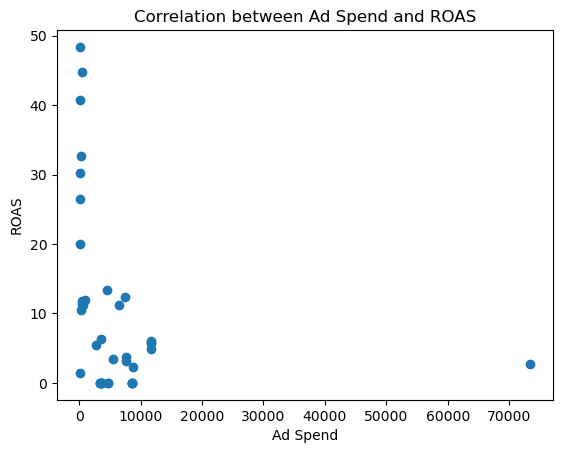

The correlation coefficient between Ad Spend and ROAS is: -0.2593114531453687


In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the data stored in a CSV file named "data.csv"
# data = pd.read_csv('data.csv')

# Extracting the "Ad Spend" and "ROAS" columns from the data
ad_spend = df['Spend']
roas = df['ROAS']

# Calculating the correlation coefficient
correlation_coefficient = ad_spend.corr(roas)

# Plotting the scatter plot
plt.scatter(ad_spend, roas)
plt.xlabel('Ad Spend')
plt.ylabel('ROAS')
plt.title('Correlation between Ad Spend and ROAS')
plt.show()

# Printing the correlation coefficient
print(f"The correlation coefficient between Ad Spend and ROAS is: {correlation_coefficient}")


In [53]:
df[df['Spend'] < 4000]

,Account ID,Impressions,Spend,Clicks,CTR,ROAS,Date,day
0,23064045,288746,3517.80,346,0.001198,6.296583,2020-01-01,Wednesday
4,23064045,94478,2813.40,126,0.001334,5.461766,2020-05-01,Friday
11,23064045,6299,76.75,155,0.024607,1.439077,2020-12-01,Tuesday
12,23064045,324473,3386.11,275,0.000848,0.000000,2021-01-01,Friday
14,23064045,129417,3441.89,203,0.001569,0.000000,2021-03-01,Monday
16,23064045,2199,3477.77,151,0.068668,0.000000,2021-05-01,Saturday
17,23064045,4331,3538.17,192,0.044332,0.000000,2021-06-01,Tuesday
21,23064045,23500,3656.56,193,0.008213,0.000000,2021-10-01,Friday
23,23064045,186370,3531.93,1205,0.006466,0.000000,2021-12-01,Wednesday
27,23064045,106649,908.14,102,0.000956,11.970394,2022-04-01,Friday


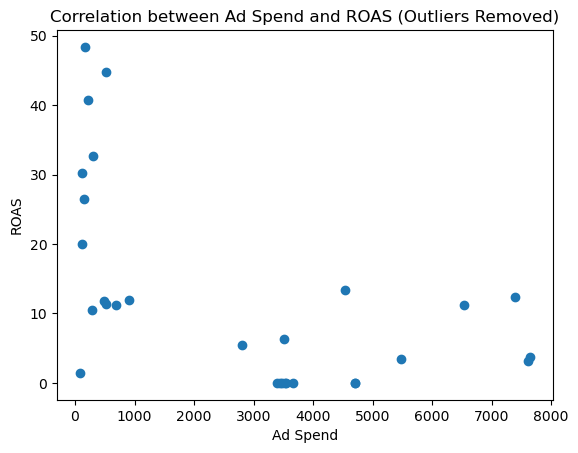

Spearman: -0.5308901294278711
Pearson: -0.5582966149906219
Kendall: -0.3675814405158153


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the data stored in a CSV file named "data.csv"
ad_spend = df[df['Spend'] < 8000]['Spend']
roas = df[df['Spend'] < 8000]['ROAS']

# Removing outliers using z-score method
z_scores = np.abs((ad_spend - ad_spend.mean()) / ad_spend.std())
ad_spend_filtered = ad_spend[z_scores < 3]  # Adjust the threshold as needed
roas_filtered = roas[z_scores < 3]  # Use the same threshold for both variables

# Calculating the correlation coefficient after removing outliers
spearman_correlation_coefficient = ad_spend_filtered.corr(roas_filtered, method = 'spearman')
pearson_correlation_coefficient = ad_spend_filtered.corr(roas_filtered, method = 'pearson')
kendall_correlation_coefficient = ad_spend_filtered.corr(roas_filtered, method = 'kendall')
# callable_correlation_coefficient = ad_spend_filtered.corr(roas_filtered, method = 'callable')

# Plotting the scatter plot after removing outliers
plt.scatter(ad_spend_filtered, roas_filtered)
plt.xlabel('Ad Spend')
plt.ylabel('ROAS')
plt.title('Correlation between Ad Spend and ROAS (Outliers Removed)')
plt.show()

# Printing the correlation coefficient after removing outliers
print(f"Spearman: {spearman_correlation_coefficient}")
print(f"Pearson: {pearson_correlation_coefficient}")
print(f"Kendall: {kendall_correlation_coefficient}")
# print(f"Callable: {callable_correlation_coefficient}")


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the data stored in a CSV file named "data.csv"
ad_spend = df['Spend']
roas = df['ROAS']

# Removing outliers using z-score method
z_scores = np.abs((ad_spend - ad_spend.mean()) / ad_spend.std())
ad_spend_filtered = ad_spend[z_scores < 3]  # Adjust the threshold as needed
roas_filtered = roas[z_scores < 3]  # Use the same threshold for both variables

# Calculating the correlation coefficient after removing outliers
correlation_coefficient = ad_spend_filtered.corr(roas_filtered, method = 'pearson')

# Plotting the scatter plot after removing outliers
# plt.scatter(ad_spend_filtered, roas_filtered)
# plt.xlabel('Ad Spend')
# plt.ylabel('ROAS')
# plt.title('Correlation between Ad Spend and ROAS (Outliers Removed)')
# plt.show()

# Printing the correlation coefficient after removing outliers
print(f"The correlation coefficient between Ad Spend and ROAS (after removing outliers) is: {correlation_coefficient}")


The correlation coefficient between Ad Spend and ROAS (after removing outliers) is: -0.5335664358140846


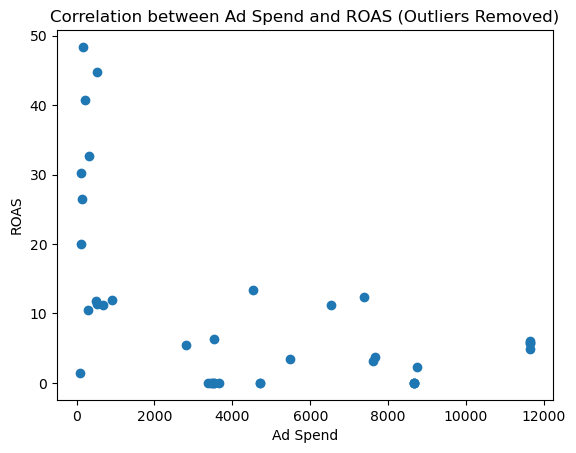

The correlation coefficient between Ad Spend and ROAS (after removing outliers) is: -0.34516499285363944


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the data stored in a CSV file named "data.csv"
ad_spend = df['Spend']
roas = df['ROAS']

# Removing outliers using z-score method
z_scores = np.abs((ad_spend - ad_spend.mean()) / ad_spend.std())
ad_spend_filtered = ad_spend[z_scores < 3]  # Adjust the threshold as needed
roas_filtered = roas[z_scores < 3]  # Use the same threshold for both variables

# Calculating the correlation coefficient after removing outliers
correlation_coefficient = ad_spend_filtered.corr(roas_filtered, method = 'kendall')

# Plotting the scatter plot after removing outliers
plt.scatter(ad_spend_filtered, roas_filtered)
plt.xlabel('Ad Spend')
plt.ylabel('ROAS')
plt.title('Correlation between Ad Spend and ROAS (Outliers Removed)')
plt.show()

# Printing the correlation coefficient after removing outliers
print(f"The correlation coefficient between Ad Spend and ROAS (after removing outliers) is: {correlation_coefficient}")


In [4]:
df = full_df.copy()
df['Date'] = df['Year'].astype(str)+'-'+df['Month'].astype(str)+'-01'
df['Date'] = pd.to_datetime(df['Date'])
df.drop(['Year', 'Month'], axis=1, inplace=True)
df['day'] = df['Date'].dt.day_name()
sales_data = df[['Spend', 'Date']].copy()
sales_data.columns = ['Spend', 'Month']
sales_data.set_index('Month', inplace=True)

In [5]:
sales_data

,Spend
Month,
2020-01-01,3517.80
2020-02-01,11653.71
2020-03-01,11653.71
2020-04-01,11653.71
2020-05-01,2813.40
2020-06-01,11653.71
2020-07-01,7653.74
2020-08-01,5470.50
2020-09-01,7603.73


In [9]:
train_data = sales_data[:'2021']
test_data = sales_data['2022':]

model = sm.tsa.statespace.SARIMAX(train_data, order=(1, 0, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()
pred_uc = results.get_forecast(steps = test_data.shape[0])

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.86175D+00    |proj g|=  7.86297D-01

At iterate    5    f=  5.53909D+00    |proj g|=  2.51644D-02

At iterate   10    f=  5.52837D+00    |proj g|=  2.79474D-03

At iterate   15    f=  5.52833D+00    |proj g|=  4.12192D-04

At iterate   20    f=  5.52566D+00    |proj g|=  1.16291D-03

At iterate   25    f=  5.52557D+00    |proj g|=  2.34879D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     42      1     0     0   

In [13]:
pred_uc.conf_int()

,lower Spend,upper Spend
2022-01-01,-43515.119939,53370.592471
2022-02-01,-36114.389658,61240.342069
2022-03-01,-36907.956728,60792.913142
2022-04-01,-36737.264763,61219.339293
2022-05-01,-45427.653269,52718.045613
2022-06-01,-37579.584355,60706.017969
2022-07-01,-40917.416464,57471.739811
2022-08-01,-43019.003836,55446.825756
2022-09-01,-41520.330915,57002.282420
2022-10-01,18065.444543,116630.118753


In [14]:
pred = results.get_prediction(start=pd.to_datetime(str(test_data.index[0].date())), dynamic=False)

In [22]:
train_data.shape[0]

24

In [25]:
sarimax_pred_sales = results.predict(start=train_data.shape[0], end=train_data.shape[0]+15, dynamic=False, typ='levels')

In [26]:
sarimax_pred_sales

2022-01-01     4927.736266
2022-02-01    12562.976205
2022-03-01    11942.478207
2022-04-01    12241.037265
2022-05-01     3645.196172
2022-06-01    11563.216807
2022-07-01     8277.161674
2022-08-01     6213.910960
2022-09-01     7740.975752
2022-10-01    67347.781648
2022-11-01     8670.863378
2022-12-01      650.753642
2023-01-01     3758.469487
2023-02-01     9214.655539
2023-03-01     4402.846430
2023-04-01     9133.680732
Freq: MS, Name: predicted_mean, dtype: float64

In [8]:
train_data = sales_data[:'2021']
test_data = sales_data['2022':]

model = sm.tsa.statespace.SARIMAX(train_data, order=(1, 0, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Model Testing - Predict 2017 sales data
start_index = len(train_data_diff)
end_index = len(train_data_diff) + len(test_data) - 1
pred = results.get_prediction(start=pd.to_datetime(str(test_data.index[0].date())), dynamic=False)
pred_uc = results.get_forecast(steps = test_data.shape[0])
pred_ci = pred_uc.conf_int()
pred_ci_cumsum = pred_ci.cumsum()

pred_ci_sales = pd.DataFrame(pred_ci_cumsum, columns=["lower Sales"])
pred_ci_sales.columns = ['lower']
pred_ci_sales['upper'] = pd.Series(train_data['Sales'].iloc[-1], index=test_data.index).add(pred_ci_cumsum['upper Sales'],fill_value=0).values

sarimax_pred_sales = results.predict(start=start_index, end=end_index, dynamic=False, typ='levels')
# sarimax_pred_cumsum = sarimax_pred.cumsum()
# sarimax_pred_sales = pd.Series(train_data['Sales'].iloc[-1], index=test_data.index)
# sarimax_pred_sales = sarimax_pred_sales.add(sarimax_pred_cumsum,fill_value=0)

# Forecasting Error Metrics
mae = np.mean(np.abs(sarimax_pred_sales - test_data['Sales']))
mse = np.mean((sarimax_pred_sales - test_data['Sales'])**2)
rmse = np.sqrt(mse)

print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.86175D+00    |proj g|=  7.86297D-01


 This problem is unconstrained.



At iterate    5    f=  5.53909D+00    |proj g|=  2.51644D-02

At iterate   10    f=  5.52837D+00    |proj g|=  2.79474D-03

At iterate   15    f=  5.52833D+00    |proj g|=  4.12192D-04

At iterate   20    f=  5.52566D+00    |proj g|=  1.16291D-03

At iterate   25    f=  5.52557D+00    |proj g|=  2.34879D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     42      1     0     0   4.677D-05   5.526D+00
  F =   5.5255660286218040     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


NameError: name 'train_data_diff' is not defined

In [ ]:
# Train Data (2005-2016) and Test Data (2017)
train_data = sales_data[:'2021']
test_data = sales_data['2022':]


# Data Preprocessing - Remove trend and seasonality
# train_data_diff = train_data.diff(periods=1).dropna()

# Define SARIMAX model
model = sm.tsa.statespace.SARIMAX(train_data, order=(1, 0, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()


# Model Testing - Predict 2017 sales data
start_index = len(train_data_diff)
end_index = len(train_data_diff) + len(test_data) - 1
pred = results.get_prediction(start=pd.to_datetime(str(test_data.index[0].date())), dynamic=False)
pred_uc = results.get_forecast(steps = test_data.shape[0])
pred_ci = pred_uc.conf_int()
pred_ci_cumsum = pred_ci.cumsum()

pred_ci_sales = pd.DataFrame(pred_ci_cumsum, columns=["lower Sales"])
pred_ci_sales.columns = ['lower']
pred_ci_sales['upper'] = pd.Series(train_data['Sales'].iloc[-1], index=test_data.index).add(pred_ci_cumsum['upper Sales'],fill_value=0).values

sarimax_pred_sales = results.predict(start=start_index, end=end_index, dynamic=False, typ='levels')
# sarimax_pred_cumsum = sarimax_pred.cumsum()
# sarimax_pred_sales = pd.Series(train_data['Sales'].iloc[-1], index=test_data.index)
# sarimax_pred_sales = sarimax_pred_sales.add(sarimax_pred_cumsum,fill_value=0)

# Forecasting Error Metrics
mae = np.mean(np.abs(sarimax_pred_sales - test_data['Sales']))
mse = np.mean((sarimax_pred_sales - test_data['Sales'])**2)
rmse = np.sqrt(mse)

print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)

# Visualization Code for True Values and Prediction values
plt.figure(figsize=(15,5))
plt.plot(train_data.index, train_data['Sales'], label='Train', color = 'cornflowerblue', marker='o', markersize=3)
plt.plot(sarimax_pred_sales.index, sarimax_pred_sales, label='SARIMAX Forecast', color='tomato',linestyle='solid', marker='o', markersize=3)
plt.plot(test_data.index, test_data['Sales'], label='Test', color='forestgreen',linestyle='dotted', marker='o', markersize=3)

plt.fill_between(pred_ci.index,
                pred_ci['lower Sales'].values,
                pred_ci['upper Sales'].values, color='r', alpha=.1)

plt.legend(loc='upper left')
plt.title('SARIMAX Forecast', size=16)
plt.xlabel('Date', size =14)
plt.ylabel('Sales', size =14)
plt.grid(True, axis='x')
plt.show()